## Sesión 04 - Laboratorio de Suministros

Primero importamos las librerías necesarias para el Análisis de Datos Exploratorio (EDA). Las versiones de estas librerías se encuentran en el archivo requirements.txt que se recomienda instalar con pip

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

Abrimos el archivo en un dataframe como .parquet porque conserva el tipo de dato a diferencia de .csv que convierte todo a string.

In [2]:
df_suministro = pd.read_parquet("suministros.parquet")

La notebook permite visualizar tanto la cabecera como la cola del dataframe como se observa a continuación

In [3]:
df_suministro

,DEPARTAMENTO,NRO_SERVICIO,TIPO_TARIFARIO,CONEXION,COORDENADA_X,COORDENADA_Y,consumo_201001,consumo_201002,consumo_201003,consumo_201004,...,consumo_202110,consumo_202111,consumo_202112,consumo_202201,consumo_202202,consumo_202203,consumo_202204,consumo_202205,consumo_202206,consumo_202207
0,La Libertad,63435012.0,BT5BR,MONOFÁSICO,-78.976071,-8.062080,NaN,NaN,NaN,NaN,...,14.0,14.0,14.0,16.0,14.0,15.0,14.0,15.0,15.0,14.0
1,La Libertad,63448244.0,BT5BR,MONOFÁSICO,-79.004644,-8.065706,NaN,NaN,NaN,NaN,...,8.0,7.0,10.0,7.0,6.0,8.0,9.0,10.0,13.0,13.0
2,La Libertad,66916519.0,BT5B,TRIFÁSICO,-79.060620,-8.043771,NaN,NaN,NaN,NaN,...,75.0,58.0,50.0,93.0,213.0,90.0,172.0,102.0,1.0,46.0
3,La Libertad,63190967.0,BT5BR,MONOFÁSICO,-79.069450,-8.020960,NaN,NaN,NaN,NaN,...,21.0,21.0,27.0,26.0,29.0,39.0,39.0,37.0,28.0,NaN
4,La Libertad,63195749.0,BT5BR,MONOFÁSICO,-78.975008,-8.062605,NaN,NaN,NaN,NaN,...,4.0,3.0,3.0,4.0,3.0,NaN,1.0,2.0,27.0,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63731,La Libertad,66890557.0,BT5BR,MONOFÁSICO,-79.007886,-8.072484,NaN,NaN,NaN,NaN,...,165.0,129.0,127.0,108.0,65.0,103.0,67.0,126.0,120.0,139.0
63732,La Libertad,64601931.0,BT5BR,MONOFÁSICO,-79.005980,-8.063865,NaN,NaN,NaN,NaN,...,40.0,13.0,9.0,8.0,41.0,NaN,NaN,NaN,NaN,NaN
63733,La Libertad,64625808.0,BT5BR,MONOFÁSICO,-78.997961,-8.081444,NaN,NaN,NaN,NaN,...,37.0,44.0,34.0,47.0,39.0,80.0,42.0,45.0,39.0,30.0
63734,La Libertad,64667281.0,BT5BR,MONOFÁSICO,-78.977805,-8.063977,NaN,NaN,NaN,NaN,...,74.0,84.0,88.0,95.0,86.0,91.0,82.0,74.0,58.0,61.0


Revisamos de que no existan clientes duplicados

In [4]:
df_suministro[df_suministro.duplicated(subset='NRO_SERVICIO', keep=False)]


,DEPARTAMENTO,NRO_SERVICIO,TIPO_TARIFARIO,CONEXION,COORDENADA_X,COORDENADA_Y,consumo_201001,consumo_201002,consumo_201003,consumo_201004,...,consumo_202110,consumo_202111,consumo_202112,consumo_202201,consumo_202202,consumo_202203,consumo_202204,consumo_202205,consumo_202206,consumo_202207


Se observa de que no existen suministros duplicados en función del número de servicio

In [5]:
df_suministro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63736 entries, 0 to 63735
Columns: 157 entries, DEPARTAMENTO to consumo_202207
dtypes: float64(154), object(3)
memory usage: 76.3+ MB


Existe un total de 157 columnas donde 154 tienen valores decimales y 3 son cadenas de caracteres, con más de 63 mil filas y el dataframe fue cargado usando 76.3 MB

In [6]:
#df_suministro.to_csv("suministros.csv", sep=';', index=False)  # código para transformar a CSV

Revisamos los nombres de las columnas accediendo a la propiedad de la clase DataFrame para tener mayor entendimiento de la data puesto que no se cuenta con un archivo de metadatos

In [7]:
print(df_suministro.columns)

Index(['DEPARTAMENTO', 'NRO_SERVICIO', 'TIPO_TARIFARIO', 'CONEXION',
       'COORDENADA_X', 'COORDENADA_Y', 'consumo_201001', 'consumo_201002',
       'consumo_201003', 'consumo_201004',
       ...
       'consumo_202110', 'consumo_202111', 'consumo_202112', 'consumo_202201',
       'consumo_202202', 'consumo_202203', 'consumo_202204', 'consumo_202205',
       'consumo_202206', 'consumo_202207'],
      dtype='object', length=157)


Revisamos la cantidad de valores nulos

In [8]:
df_suministro.isnull().sum()

DEPARTAMENTO         0
NRO_SERVICIO         0
TIPO_TARIFARIO       0
CONEXION             0
COORDENADA_X       503
                  ... 
consumo_202203    6391
consumo_202204    6315
consumo_202205    6219
consumo_202206    6255
consumo_202207    6269
Length: 157, dtype: int64

Como se logra observar la columna COORDENADA_X y muchas de las columnas de los periodos de consumo tienen valores faltantes, alrededor de 6 mil en el caso de los periodos de consumo. Seguidamente, calcularemos el porcentaje de valores faltante por columna para decidir su tratamiento posterior 

In [9]:
# Seleccionar solo las columnas de consumo
columnas_consumo = [col for col in df_suministro.columns if col.startswith("consumo_")]
df_consumo = df_suministro[columnas_consumo].copy()

In [10]:
nulos_porcentaje = df_consumo.isnull().mean() * 100
print(nulos_porcentaje.sort_values(ascending=False))

consumo_201001    45.131480
consumo_201002    45.074997
consumo_201003    45.048324
consumo_201004    45.046755
consumo_201005    44.552529
                    ...    
consumo_202203    10.027300
consumo_202204     9.908058
consumo_202207     9.835886
consumo_202206     9.813920
consumo_202205     9.757437
Length: 151, dtype: float64


Imputaremos los valores faltantes con la media de cada cliente para conservar el patrón de consumo típico y lo agregaremos por cliente para realizar el análisis

In [11]:
# Se crea una copia del df
df_consumo = df_suministro[['NRO_SERVICIO'] + columnas_consumo].copy()

# Se imputan los valores faltantes la media por cliente
media_por_cliente = df_consumo[columnas_consumo].mean(axis=1)
for columna in columnas_consumo:
    df_consumo[columna] = df_consumo[columna].fillna(media_por_cliente)

df_consumo = df_consumo.copy()

# Se agregan los consumos
df_consumo['consumo_total'] = df_consumo[columnas_consumo].sum(axis=1)

df_consumo_total = df_consumo[['NRO_SERVICIO','consumo_total']]
df_consumo_total

,NRO_SERVICIO,consumo_total
0,63435012.0,2222.531250
1,63448244.0,5966.540541
2,66916519.0,12105.166667
3,63190967.0,1699.627907
4,63195749.0,2015.068966
...,...,...
63731,66890557.0,17742.500000
63732,64601931.0,3473.000000
63733,64625808.0,6550.523810
63734,64667281.0,12155.500000


In [ ]:
# TODO: utilizar el promedio

df_consumo_total_miles = df_consumo_total[['consumo_total']].copy()
# Escala el consumo a miles de kWh (MWh)
df_consumo_total_miles['consumo_miles'] = df_consumo_total['consumo_total'] / 1000

df_consumo_total_miles['consumo_miles'].describe()

count    63736.000000
mean        13.547423
std         28.581942
min          0.000000
25%          4.156136
50%          8.624852
75%         15.067500
max       1712.749321
Name: consumo_miles, dtype: float64

De las estadísticas fundamentales, se observa que existen registros mínimos cercanos a cero (incluso en miles) que deben de corresponder a medidores nuevos o de extremadamente bajo consumo y que existen consumos extremos de 1,712 (en miles) de kWh en el periodo de análsis desde enero de 2010 a julio de 2022

A continuación, realizamos de detección de outliers con diferentes técnicas

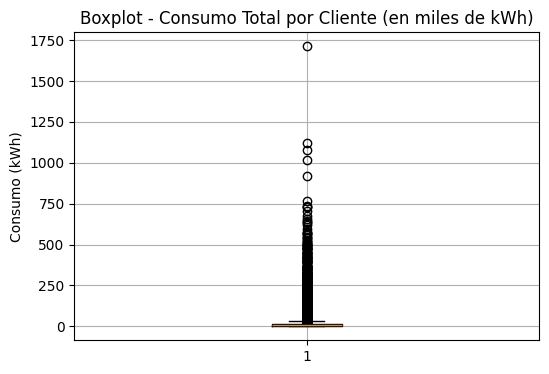

In [13]:
########Grafica de Boxplot

plt.figure(figsize=(6, 4))
plt.boxplot(df_consumo_total_miles['consumo_miles'])
plt.title("Boxplot - Consumo Total por Cliente (en miles de kWh)")
plt.ylabel("Consumo (kWh)")
plt.grid(True)
plt.show()


Visualmente, detectamos la presencia de valores extremos, es decir, de outliers o valores atípicos como un registro de casi 1,750 miles de kWh mientras que la mayoría de de puntos se ubican en la pate inferior. A simple vista, la mayor parte de los valores se encuentran concentrados en valores bastante bajos, es decir consumos bajos. POr lo tanto, la distribución está sesgada a la derecha (asimetría positiva)

In [14]:
##################################### Métodos de Detección Outlier ####################

In [15]:
#######   Método IQR #########

# Calcular columnas adicionales
df_consumo_total_miles['z_score'] = zscore(df_consumo_total_miles['consumo_miles'])
df_consumo_total_miles['valor_shifted'] = df_consumo_total_miles['consumo_miles'] - df_consumo_total_miles['consumo_miles'].min()
df_consumo_total_miles['diff'] = df_consumo_total_miles['consumo_miles'] - df_consumo_total_miles['consumo_miles'].median()
mad = np.mean(np.abs(df_consumo_total_miles['diff']))  # cálculo manual de MAD
df_consumo_total_miles['mad_score'] = df_consumo_total_miles['diff'] / mad

# Aplicar método IQR
Q1 = df_consumo_total_miles['consumo_miles'].quantile(0.25)
Q3 = df_consumo_total_miles['consumo_miles'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar los outliers
outliers_iqr = df_consumo_total_miles[(df_consumo_total_miles['consumo_miles'] < limite_inferior) | (df_consumo_total_miles['consumo_miles'] > limite_superior)]

# Paso 5: Mostrar resumen con todas las métricas
outliers_iqr.describe()



,consumo_total,consumo_miles,z_score,valor_shifted,diff,mad_score
count,3.887000e+03,3887.000000,3887.000000,3887.000000,3887.000000,3887.000000
mean,7.619632e+04,76.196316,2.191922,76.196316,67.571465,7.232054
std,9.196754e+04,91.967536,3.217705,91.967536,91.967536,9.843123
min,3.143984e+04,31.439844,0.626009,31.439844,22.814992,2.441848
25%,3.640100e+04,36.401000,0.799587,36.401000,27.776148,2.972832
50%,4.546881e+04,45.468810,1.116846,45.468810,36.843959,3.943344
75%,6.949329e+04,69.493287,1.957400,69.493287,60.868435,6.514641
max,1.712749e+06,1712.749321,59.450656,1712.749321,1704.124470,182.389431


Tanto z-score (cuantas desviaciones se aleja cada punto de la media) con valores como 59.45 superiores a 3 y mad-score (cuantas desviaciones se aleja cada punto de la mediana) como 182.38 extremadamente superior a 3.5 verifican la presencia de outliers a nivel de números. Se procederá a contar la cantidad de valores atípicos

In [16]:
############## Método Z-Score (estandarización)

# calculo de z score
df_consumo_total_miles['z_score'] = zscore(df_consumo_total_miles['consumo_miles'])

# Calcula la diferencia con la mediana
mediana = df_consumo_total_miles['consumo_miles'].median()
df_consumo_total_miles['diff'] = df_consumo_total_miles['consumo_miles'] - mediana

# Calcula mad_score (z-score robusto)
mad = np.median(np.abs(df_consumo_total_miles['diff']))
df_consumo_total_miles['mad_score'] = 0.6745 * df_consumo_total_miles['diff'] / mad

# Filtra outliers por z-score
outliers_z = df_consumo_total_miles[df_consumo_total_miles['z_score'].abs() > 3]

print("Resumen de outliers detectados por Z-Score:")
print(outliers_z.describe())

Resumen de outliers detectados por Z-Score:
       consumo_total  consumo_miles     z_score  valor_shifted         diff  \
count   5.990000e+02     599.000000  599.000000     599.000000   599.000000   
mean    2.340477e+05     234.047718    7.714732     234.047718   225.422866   
std     1.552668e+05     155.266837    5.432383     155.266837   155.266837   
min     9.943800e+04      99.438000    3.005088      99.438000    90.813148   
25%     1.302914e+05     130.291376    4.084567     130.291376   121.666524   
50%     1.853380e+05     185.338043    6.010507     185.338043   176.713191   
75%     2.862823e+05     286.282273    9.542283     286.282273   277.657421   
max     1.712749e+06    1712.749321   59.450656    1712.749321  1704.124470   

        mad_score  
count  599.000000  
mean    29.677584  
std     20.441336  
min     11.955818  
25%     16.017756  
50%     23.264812  
75%     36.554417  
max    224.353002  


De esta tabla de valores detectados con Z-score, se observa que hay un total de 599 valores atípicos van desde 99,438 kWh hasta 1,7121749 kWh. Esto quiere decir que hay un segmento que consume electricidad muy por encima por el promedio general de 234,047 kWh en esos 12 años

In [17]:
########################Método MAD (Desviación Absoluta Mediana)

# Paso 1: Preparar el DataFrame
# Paso 2: Calcular columnas auxiliares
df_consumo_total_miles['z_score'] = zscore(df_consumo_total_miles['consumo_miles'])  # z-score
df_consumo_total_miles['valor_shifted'] = df_consumo_total_miles['consumo_miles'] - df_consumo_total_miles['consumo_miles'].min()  # valor ajustado
df_consumo_total_miles['diff'] = df_consumo_total_miles['consumo_miles'] - df_consumo_total_miles['consumo_miles'].median()  # diferencia con mediana
mad = np.median(np.abs(df_consumo_total_miles['consumo_miles'] - df_consumo_total_miles['consumo_miles'].median()))  # MAD robusto
# print(mad)
df_consumo_total_miles['mad_score'] = 0.6745 * (df_consumo_total_miles['consumo_miles'] - df_consumo_total_miles['consumo_miles'].median()) / mad  # z-score robusto

# Paso 3: Filtrar outliers por MAD (> 3.5)
outliers_mad = df_consumo_total_miles[np.abs(df_consumo_total_miles['mad_score']) > 3.5]

# Paso 4: Mostrar tabla resumen como en la imagen
# print(outliers_mad[['consumo_miles', 'z_score', 'valor_shifted', 'diff', 'mad_score']].describe())
outliers_mad = df_consumo_total_miles[np.abs(df_consumo_total_miles['mad_score']) > 3.5]
print(outliers_mad[['consumo_miles', 'mad_score']].describe())



       consumo_miles    mad_score
count    3120.000000  3120.000000
mean       86.774415    10.288620
std        99.851963    13.145805
min        35.224000     3.501856
25%        41.019184     4.264809
50%        51.942500     5.702896
75%        80.804250     9.502630
max      1712.749321   224.353002


Con el método Median Absolute Deviation (MAD), se detectaron más valores atípicos que con z score, unos 3,120 clientes con consumos alejados significativamente de la mediana

In [18]:
########### Método Percentiles extremos

# --- Paso 1: Preparar el DataFrame ---
# --- Paso 2: Calcular columnas auxiliares ---
df_consumo_total_miles['z_score'] = zscore(df_consumo_total_miles['consumo_miles'])  # estandarización
df_consumo_total_miles['valor_shifted'] = df_consumo_total_miles['consumo_miles'] - df_consumo_total_miles['consumo_miles'].min()  # valor trasladado
df_consumo_total_miles['diff'] = df_consumo_total_miles['consumo_miles'] - df_consumo_total_miles['consumo_miles'].median()  # diferencia con la mediana

# --- Paso 3: Calcular límites de percentil 1% y 99% ---
limite_inf = df_consumo_total_miles['consumo_miles'].quantile(0.01)
limite_sup = df_consumo_total_miles['consumo_miles'].quantile(0.99)

# --- Paso 4: Filtrar outliers por percentiles ---
outliers_pct = df_consumo_total_miles[(df_consumo_total_miles['consumo_miles'] < limite_inf) | (df_consumo_total_miles['consumo_miles'] > limite_sup)]

# --- Paso 5: Mostrar resumen ---
print("Outliers detectados con percentiles (1% y 99%):")
print(outliers_pct[['consumo_miles', 'z_score', 'valor_shifted', 'diff']].describe())


Outliers detectados con percentiles (1% y 99%):
       consumo_miles      z_score  valor_shifted         diff
count    1043.000000  1043.000000    1043.000000  1043.000000
mean      138.020934     4.355004     138.020934   129.396082
std       163.110069     5.706797     163.110069   163.110069
min         0.000000    -0.473989       0.000000    -8.624852
25%         0.000000    -0.473989       0.000000    -8.624852
50%       110.854685     3.404528     110.854685   102.229833
75%       204.635837     6.685687     204.635837   196.010985
max      1712.749321    59.450656    1712.749321  1704.124470


COn el enfoque basado en percentiles extremos, se detectaron 1043 outliers con consumos totales fuera de los rangos

In [ ]:
############### Método por diferencias sucesivas (series temporales)

# --- Paso 1: Preparar el DataFrame ---
# --- Paso 2: Calcular z_score y columnas auxiliares ---
df['z_score'] = zscore(df['valor'])
df['valor_shifted'] = df['valor'].shift(1)  # desplazamiento temporal
df['diff'] = (df['valor'] - df['valor_shifted']).abs()  # diferencia absoluta entre valores consecutivos

# --- Paso 3: Definir umbral como media + 3 * desviación estándar de la diferencia ---
umbral = df['diff'].mean() + 3 * df['diff'].std()

# --- Paso 4: Filtrar outliers por salto abrupto ---
outliers_diff = df[df['diff'] > umbral]

# --- Paso 5: Mostrar resumen de outliers detectados por diferencia temporal ---
print("Outliers detectados por saltos abruptos (diferencia temporal):")
print(outliers_diff[['valor', 'z_score', 'valor_shifted', 'diff']].describe())


In [ ]:
################################# Visualización con Seaborn

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
# Limpieza de nombres de columnas para evitar errores
df_suministro.columns = df_suministro.columns.str.strip().str.lower()

# Copia con columnas relevantes
df_plot = df_suministro[['consumo_201001', 'consumo_201002', 'departamento']].dropna()

# Gráfico de dispersión
sns.scatterplot(data=df_plot, x='consumo_201001', y='consumo_201002', hue='departamento')
plt.title("Dispersión de consumo enero vs febrero por departamento")
plt.xlabel("Consumo enero")
plt.ylabel("Consumo febrero")
plt.grid(True)
plt.show()

# Boxplot de consumo enero por departamento
sns.boxplot(data=df_plot, x='departamento', y='consumo_201001')
plt.title("Distribución de consumo enero por departamento")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



In [ ]:
###########################  Detección multivariable con distancia de Mahalanobis

In [ ]:
from scipy.spatial import distance
from scipy.stats import chi2

In [ ]:
# Selección de variables para análisis multivariado
X = df_suministro[['consumo_201001', 'consumo_201002']].dropna()

# Calcular media y matriz de covarianza
mean_vec = X.mean().values
cov_matrix = np.cov(X.values.T)
inv_cov_matrix = np.linalg.inv(cov_matrix)

# Función para calcular distancia de Mahalanobis
def mahalanobis_distance(row, mean, inv_cov):
    return distance.mahalanobis(row, mean, inv_cov)

# Calcular la distancia para cada fila
X['mahal_dist'] = X.apply(lambda row: mahalanobis_distance(row, mean_vec, inv_cov_matrix), axis=1)

# Umbral chi-cuadrado con 2 grados de libertad (por 2 variables)
umbral = np.sqrt(chi2.ppf(0.975, df=2))  # ≈ 2.4477

# Clasificación de outliers
X['outlier_mahal'] = X['mahal_dist'] > umbral

# Visualización
sns.scatterplot(data=X, x='consumo_201001', y='consumo_201002', hue='outlier_mahal', palette={True: 'red', False: 'blue'})
plt.title("Outliers multivariables con distancia de Mahalanobis")
plt.xlabel("Consumo enero")
plt.ylabel("Consumo febrero")
plt.grid(True)
plt.show()


In [ ]:
############################## Metodos para Imputar valores Faltantes

In [ ]:
# librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = df_suministro = pd.read_parquet("suministros.parquet")

In [ ]:
df.columns = df.columns.str.strip().str.lower()

In [ ]:
# Ver nombres exactos de columnas luego de pasar a minúsculas
print(df.columns.tolist())

In [ ]:
# Seleccionar columnas y renombrar
df_plot = df[['nro_servicio', 'consumo_201001']].copy()
df_plot = df_plot.rename(columns={'nro_servicio': 'fecha', 'consumo_201001': 'valor'})

# Gráfico de valores con posibles faltantes
plt.figure(figsize=(12, 4))
sns.lineplot(data=df_plot, x='fecha', y='valor', marker='o')
plt.title("Valores con Datos Faltantes - consumo_201001")
plt.xlabel("NRO_SERVICIO")
plt.ylabel("Consumo")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# 2. Imputación con la media (promedio)
df_media = df[['nro_servicio', 'consumo_201001']].copy()
# Crear copia de df_plot para imputación con la media
df_media = df_plot.copy()

# Calcular la media sin contar los valores NaN
media = df_media['valor'].mean()

# Reemplazar los NaN con la media
df_media['valor'] = df_media['valor'].fillna(media)


In [ ]:
# Gráfico de la serie imputada con la media
plt.figure(figsize=(12, 4))
sns.lineplot(data=df_media, x='fecha', y='valor', marker='o')
plt.title("Valores con Datos Faltantes - consumo_201001")
plt.xlabel("NRO_SERVICIO")
plt.ylabel("Consumo (imputado)")
plt.tight_layout()
plt.show()

In [ ]:
# 3. Imputación con la media +/- desviación estándar (valor aleatorio)
df_std = df_plot.copy()

# Calcular media y desviación estándar de los valores no nulos
mean = df_std['valor'].mean()
std = df_std['valor'].std()

# Aplicar imputación aleatoria dentro del rango [mean - std, mean + std]
df_std['valor'] = df_std['valor'].apply(
    lambda x: x if not pd.isna(x) else np.random.uniform(mean - std, mean + std)
)

In [ ]:
# Visualización
plt.figure(figsize=(12, 4))
sns.lineplot(data=df_std, x='fecha', y='valor', marker='o')
plt.title("Valores imputados con media ± desviación estándar - consumo_201001")
plt.xlabel("NRO_SERVICIO")
plt.ylabel("Consumo (imputado aleatoriamente)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# 4. Imputación personalizada: promedio entre anterior y posterior
df_interp = df_plot.copy()

# Aplicar imputación fila por fila
for i in range(len(df_interp)):
    if pd.isna(df_interp.iloc[i]['valor']):
        prev_val = df_interp.iloc[i - 1]['valor'] if i > 0 else np.nan
        next_val = df_interp.iloc[i + 1]['valor'] if i < len(df_interp) - 1 else np.nan

        if not np.isnan(prev_val) and not np.isnan(next_val):
            df_interp.at[i, 'valor'] = (prev_val + next_val) / 2
        else:
            df_interp.at[i, 'valor'] = 0  # Si uno de los dos no existe o es NaN


In [ ]:
# Visualización
plt.figure(figsize=(12, 4))
sns.lineplot(data=df_interp, x='fecha', y='valor', marker='o')
plt.title("Valores imputados por promedio entre anterior y posterior - consumo_201001")
plt.xlabel("NRO_SERVICIO")
plt.ylabel("Consumo (interpolado manual)")
plt.tight_layout()
plt.show()


In [ ]:
# 5. Imputación con Promedios Móviles (ventana de 6 posiciones)
df_movavg = df_plot.copy()

# Aplicar imputación con promedio móvil (rolling mean)
df_movavg['valor'] = df_movavg['valor'].fillna(
    df_movavg['valor'].rolling(window=6, min_periods=1).mean()
)

In [ ]:
# Visualización
plt.figure(figsize=(12, 4))
sns.lineplot(data=df_movavg, x='fecha', y='valor', marker='o')
plt.title("Valores imputados con promedio móvil (ventana = 6) - consumo_201001")
plt.xlabel("NRO_SERVICIO")
plt.ylabel("Consumo (rolling mean)")
plt.tight_layout()
plt.show()

In [ ]:
# 6. Imputación con técnicas de propagación
df_ffill = df_plot.copy()
df_ffill['valor'] = df_ffill['valor'].fillna(method='ffill')  # Hacia adelante

df_bfill = df_plot.copy()
df_bfill['valor'] = df_bfill['valor'].fillna(method='bfill')  # Hacia atrás

In [ ]:
# Visualización
plt.figure(figsize=(12, 4))
sns.lineplot(data=df_bfill, x='fecha', y='valor', marker='o')
plt.title("Valores imputados con propagación hacia atrás (bfill) - consumo_201001")
plt.xlabel("NRO_SERVICIO")
plt.ylabel("Consumo (bfill)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
# 7. Imputación con un valor constante (por ejemplo, 0)
df_const = df_plot.copy()
df_const['valor'] = df_const['valor'].fillna(0)

In [ ]:
# Visualización
plt.figure(figsize=(12, 4))
sns.lineplot(data=df_const, x='fecha', y='valor', marker='o')
plt.title("Valores imputados con valor constante (0) - consumo_201001")
plt.xlabel("NRO_SERVICIO")
plt.ylabel("Consumo (constante)")
plt.tight_layout()
plt.show()


In [ ]:
# Comparación visual de los métodos
# Crear figura con subplots 4x2 (8 espacios, usaremos 7)
fig, axes = plt.subplots(4, 2, figsize=(18, 16), sharex=True)

# Lista de imputaciones y sus nombres
methods = [df_media, df_std, df_interp, df_movavg, df_ffill, df_bfill, df_const]
titles = ['Media', 'Media ± STD', 'Interpolación', 'Prom. Móvil', 'Forward Fill', 'Backward Fill', 'Valor Constante']

# Graficar cada método junto a la serie original
for ax, df_met, title in zip(axes.flat, methods, titles):
    sns.lineplot(data=df_plot, x='fecha', y='valor', label='Original', ax=ax, marker='o')
    sns.lineplot(data=df_met, x='fecha', y='valor', label=title, ax=ax)
    ax.set_title(f"Imputación: {title}")
    ax.legend()

plt.tight_layout()
plt.show()



In [ ]:
################################################# Normalización de Datos #################################

In [ ]:
# librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= df_plot.copy()

In [ ]:
df.describe()

In [ ]:
# 2. Normalización Min-Max: escala cada valor entre 0 y 1
df_minmax = df.copy()
for col in df_minmax.columns:
    min_val = df_minmax[col].min()
    max_val = df_minmax[col].max()
    df_minmax[col] = (df_minmax[col] - min_val) / (max_val - min_val)

In [ ]:
df_minmax.describe()

In [ ]:
# 3. Z-Score
df_zscore = df.copy()
for col in df_zscore.columns:
    mean = df_zscore[col].mean()
    std = df_zscore[col].std()
    df_zscore[col] = (df_zscore[col] - mean) / std

In [ ]:
df_zscore.describe()

In [ ]:
# 4. Escalamiento Six Sigma: media 0, rango de ±3σ → [0,1]
df_sixsigma = df.copy()
for col in df_sixsigma.columns:
    mean = df_sixsigma[col].mean()
    std = df_sixsigma[col].std()
    df_sixsigma[col] = (df_sixsigma[col] - mean + 3*std) / (6*std)

In [ ]:
df_sixsigma.describe()

In [ ]:
# 5. Escalado robusto con IQR (percentil 25-75)
df_robust = df.copy()
for col in df_robust.columns:
    q1 = df_robust[col].quantile(0.25)
    q3 = df_robust[col].quantile(0.75)
    iqr = q3 - q1
    df_robust[col] = (df_robust[col] - q1) / iqr

In [ ]:
df_robust.describe()

In [ ]:
# 6. Escalado logarítmico: útil para datos con alta dispersión positiva
df_log = df.copy()
for col in df_log.columns:
    min_val = df_log[col].min()
    df_log[col] = np.log1p(df_log[col] - min_val + 1)  # log(x - min + 1)

In [ ]:
df_log.describe()

In [ ]:
# 7. MaxAbs Scaling: divide por el valor absoluto máximo
df_maxabs = df.copy()
for col in df_maxabs.columns:
    max_abs = np.abs(df_maxabs[col]).max()
    df_maxabs[col] = df_maxabs[col] / max_abs

In [ ]:
df_maxabs.describe()

In [ ]:
# 8. Escalamiento Six Sigma basado en limites
df_sixsigma = df.copy()
df_clipped = df.copy()

# Escalamiento tipo Six Sigma y clipping
for col in df.columns:
    mean = df[col].mean()
    std = df[col].std()

    # Escalamiento normal al rango [0,1] usando el rango de 6σ
    df_sixsigma[col] = (df[col] - mean + 3 * std) / (6 * std)

    # Límite inferior y superior (3σ)
    lower_limit = mean - 3 * std
    upper_limit = mean + 3 * std

    # Clipping: sustituir valores fuera de ±3σ con los límites
    df_clipped[col] = df[col].clip(lower=lower_limit, upper=upper_limit)

In [ ]:
# Comparar distribuciones originales vs normalizadas
fig, axes = plt.subplots(3, 8, figsize=(25, 10))
cols = df.columns

for i, col in enumerate(cols):
    sns.histplot(df[col], ax=axes[i][0], kde=True, color="#AEC6CF")
    axes[i][0].set_title(f"{col} - Original")
    
    sns.histplot(df_minmax[col], ax=axes[i][1], kde=True, color="#FFB347")
    axes[i][1].set_title(f"{col} - MinMax")
    
    sns.histplot(df_zscore[col], ax=axes[i][2], kde=True, color="#77DD77")
    axes[i][2].set_title(f"{col} - Z-Score")
    
    sns.histplot(df_sixsigma[col], ax=axes[i][3], kde=True, color="#FF6961")
    axes[i][3].set_title(f"{col} - sixsigma ")
    
    sns.histplot(df_robust[col], ax=axes[i][4], kde=True, color="#FDFD96")
    axes[i][4].set_title(f"{col} - IQR ")
    
    sns.histplot(df_log[col], ax=axes[i][5], kde=True, color="#CBAACB")
    axes[i][5].set_title(f"{col} - logarítmico ")
    
    sns.histplot(df_maxabs[col], ax=axes[i][6], kde=True, color="#B39EB5")
    axes[i][6].set_title(f"{col} - MaxAbs Scaling ")
    
    sns.histplot(df_maxabs[col], ax=axes[i][7], kde=True, color="#FF6961")
    axes[i][7].set_title(f"{col} - sixsigma limites ")


plt.tight_layout()
plt.show()

In [ ]:
#| Técnica       | Uso Principal                          | Sensible a outliers |
#| ------------- | -------------------------------------- | ------------------- |
#| Min-Max       | Escala uniforme \[0, 1]                |  Sí                |
#| Z-Score       | Estandarización clásica                |  Sí                |
#| Six Sigma     | Datos bajo control de calidad          |  Sí                |
#| IQR (Robusto) | Datos con outliers extremos            |  No                |
#| Logarítmico   | Datos sesgados a la derecha            |  Sí                |